# Predicting Boston Housing Prices

## 1. Statistical Analysis and Data Exploration

In [1]:
"""Load the Boston dataset and examine its target (label) distribution."""

# Load libraries
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

################################
### ADD EXTRA LIBRARIES HERE ###
################################

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import NearestNeighbors

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def load_data():
    """Load the Boston dataset."""

    boston = datasets.load_boston()

    return boston

city_data = load_data()

housing_prices type =  <type 'numpy.ndarray'>
housing_features type =  <type 'numpy.ndarray'>
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      

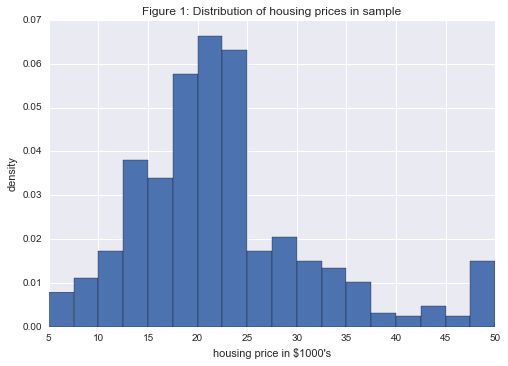

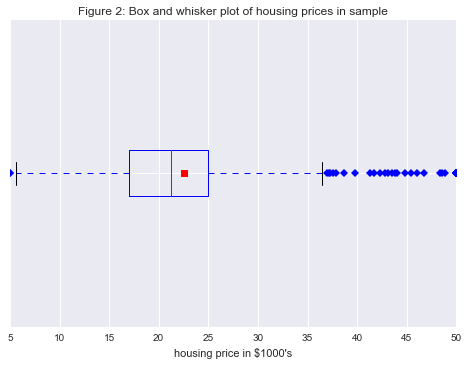

In [3]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    # Number of features?
    # Minimum price?
    # Maximum price?
    # Calculate mean price?
    # Calculate median price?
    # Calculate standard deviation?
    
    print "housing_prices type = ", type(housing_prices)
    print "housing_features type = ", type(housing_features)
    
    print city_data.DESCR, "\n"
    
    print "housing_prices dimensions = ", housing_prices.shape
    print "housing_features dimensions = ", housing_features.shape, "\n"

    print "min price = ", np.min(housing_prices)
    print "max price = ", np.max(housing_prices)
    print "mean price = ", np.mean(housing_prices)
    print "median price = ", np.median(housing_prices)
    print "price stdev = ", np.std(housing_prices)
    print "price population stdev estimate = ", np.std(housing_prices, ddof=1), "\n"
    
    plt.hist(housing_prices, bins=18, normed=True)
    plt.title("Figure 1: Distribution of housing prices in sample")
    plt.xlabel("housing price in $1000's")
    plt.ylabel("density")
    savefig('Figures/hist.pdf')
    
    plt.figure()
    plt.boxplot(housing_prices, sym='gD', vert=False, showmeans=True, labels = [''])
    plt.title("Figure 2: Box and whisker plot of housing prices in sample")
    plt.xlabel("housing price in $1000's")
    savefig('Figures/boxplot.pdf')

explore_city_data(city_data)

## 2. Evaluating Model Performance

In [4]:
def split_data(city_data):
    """Randomly shuffle the sample set. Divide it into 70 percent training and 30 percent testing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    ###################################
    ### Step 2. YOUR CODE GOES HERE ###
    ###################################

    X_train, X_test, y_train, y_test \
    = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(city_data)

print type(X_train), type(y_train), type(X_test), type(y_test), '\n'
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'> 

(354, 13) (354,) (152, 13) (152,)


In [5]:
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
    
    return mean_squared_error(label, prediction)

performance_metric(y_train, y_train)

0.0

## 3. Analyzing Model Performance

In [6]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot learning curve graph
    learning_curve_graph(depth, sizes, train_err, test_err)

In [7]:
def learning_curve_graph(depth, sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Figure '+ str(depth+2) +': Max depth = '+ str(depth))
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    savefig('Figures/learning'+str(depth)+'.pdf')
    pl.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [9]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Figure 13: Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    savefig('Figures/complexity.pdf')
    pl.show()

## 4. Model Prediction

In [10]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target
    # X, y = city_data.data[:504,:], city_data.target[:504]
    # print X.shape, y.shape

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    
    perf_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV

    reg = GridSearchCV(regressor, parameters, scoring=perf_scorer)#, iid=False)
    
    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y), "\n"

    print "Final Params: "
    print reg.best_estimator_, "\n"

    print "Scores on grid: "
    print reg.grid_scores_, "\n"

    print "grid_scores_ check: "
    print reg.grid_scores_[3].cv_validation_scores, "\n"
    print reg.grid_scores_[3].cv_validation_scores.mean(), reg.grid_scores_[3].cv_validation_scores.std()
    
    # Choose the max depth that best generalises the model
    regressor.max_depth = 4
    regressor.fit( X , y )    
    
    # Use the model to predict the output of a particular sample
    x_client = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y_client = regressor.predict(x_client)

    print "House: " + str(x_client)
    print "Prediction: " + str(y_client), "\n"
    
    return x_client, y_client[0]

fit_predict_model(city_data)

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0) 

Final Params: 
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') 

Scores on grid: 
[mean: -68.08279, std: 25.52601, params: {'max_depth': 1}, mean: -46.72022, std: 21.02827, params: {'max_depth': 2}, mean: -44.96641, std: 13.29444, 

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


([11.95,
  0.0,
  18.1,
  0,
  0.659,
  5.609,
  90.0,
  1.385,
  24,
  680.0,
  20.2,
  332.09,
  12.13],
 21.62974358974359)

In [11]:
def check_price_reasonable(city_data, y_client):
    """Find the lower and upper percentile of the data our client's predicted price falls within"""

    housing_prices = np.sort(city_data.target)
    #print housing_prices.shape
    #print housing_prices[0], housing_prices[505]
    index = np.searchsorted(housing_prices, y_client)
    #print housing_prices[index-1], housing_prices[index]
    print "lower percentile: ", float(index)/float(housing_prices.size)
    print "upper percetile: ", float(index+1)/float(housing_prices.size), "\n"

check_price_reasonable(city_data, 21.62974359)

lower percentile:  0.52371541502
upper percetile:  0.525691699605 



In [12]:
# http://scikit-learn.org/stable/modules/neighbors.html#finding-the-nearest-neighbors

def find_k_nearest_neighbour_indices(x, X, k):
    """Find the indices of the data points closest to our client's house"""
    
    neighbours = NearestNeighbors( n_neighbors = k )
    neighbours.fit(X)
    distance, indices = neighbours.kneighbors( x )
    return indices

In [13]:
def compare_with_knn(city_data, x_client):
    """Compare the price of our client's house with that of the houses most similar to theirs"""
    
    housing_features, housing_prices = city_data.data, city_data.target
    
    k = 10
    indices = find_k_nearest_neighbour_indices(x_client, housing_features, k)

    knn_prices = []
    for i in indices:
        knn_prices.append(housing_prices[i])

    print str(k) + " nearest neighbours mean price = " + str(np.mean(knn_prices))
    print str(k) + " nearest neighbours std price = " + str(np.std(knn_prices))
    
compare_with_knn(city_data, [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13])

10 nearest neighbours mean price = 21.52
10 nearest neighbours std price = 10.3099757517


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


housing_prices type =  <type 'numpy.ndarray'>
housing_features type =  <type 'numpy.ndarray'>
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


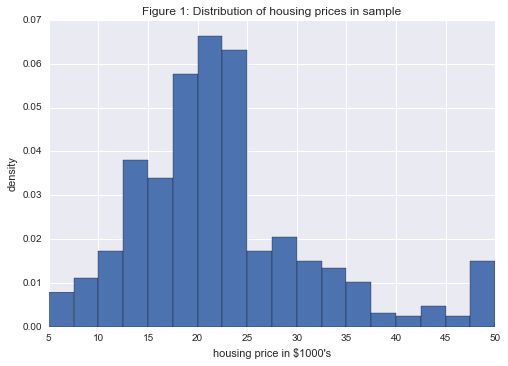

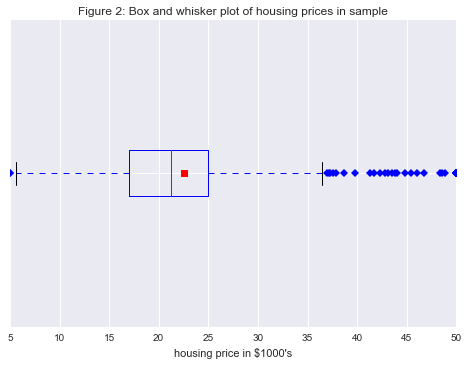

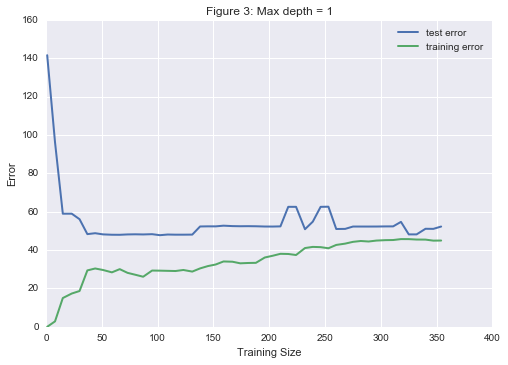

Decision Tree with Max Depth: 
2


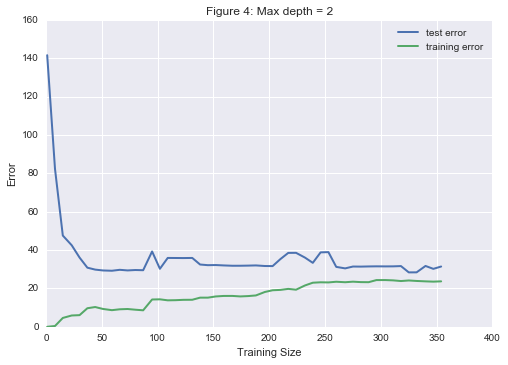

Decision Tree with Max Depth: 
3


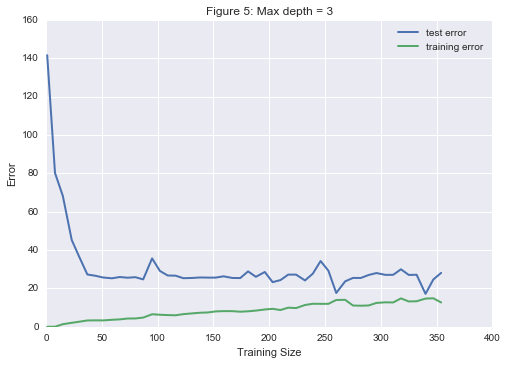

Decision Tree with Max Depth: 
4


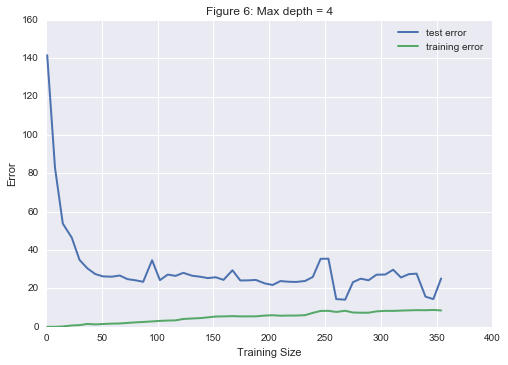

Decision Tree with Max Depth: 
5


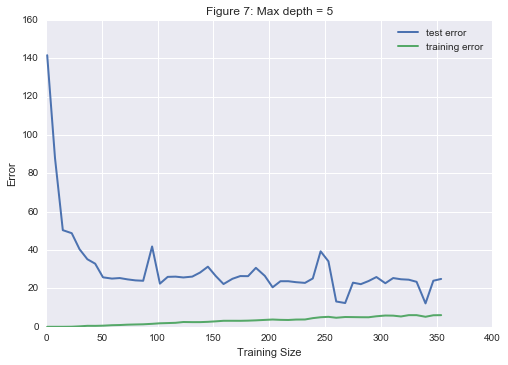

Decision Tree with Max Depth: 
6


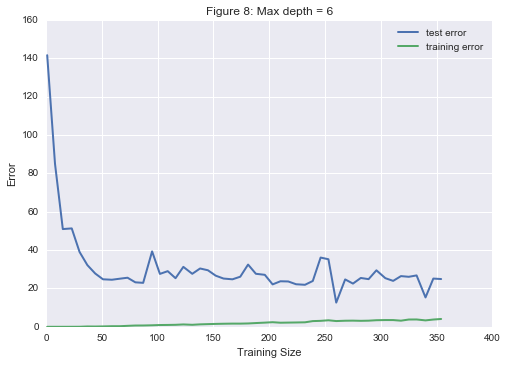

Decision Tree with Max Depth: 
7


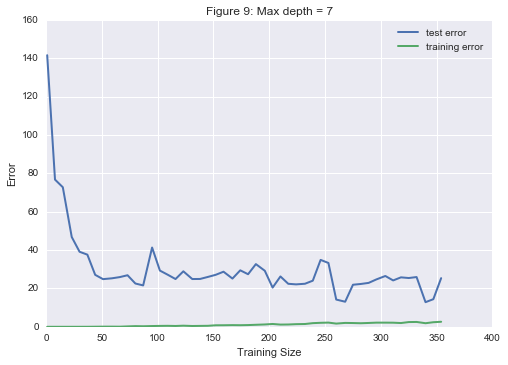

Decision Tree with Max Depth: 
8


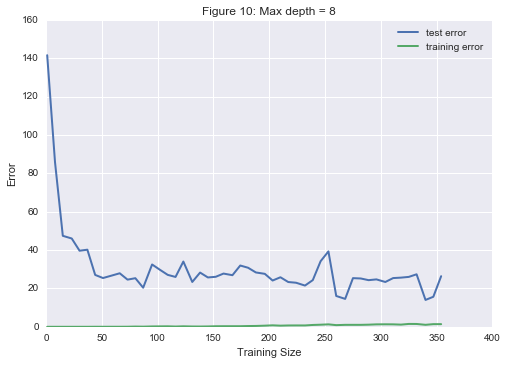

Decision Tree with Max Depth: 
9


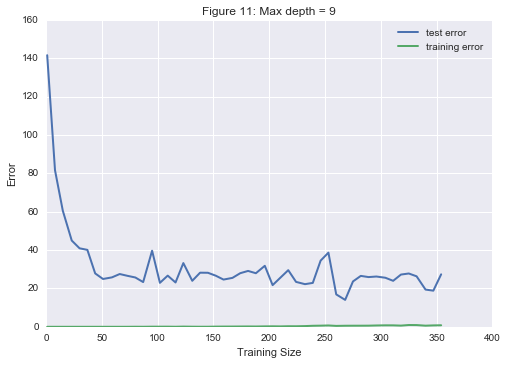

Decision Tree with Max Depth: 
10


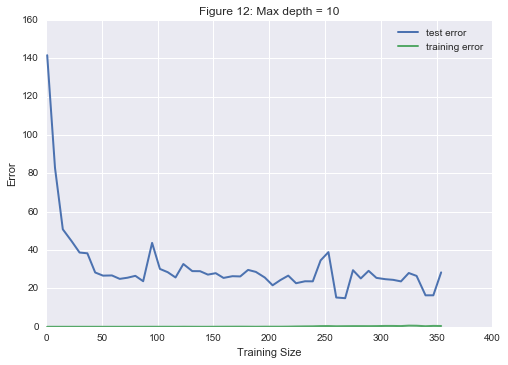

Model Complexity: 


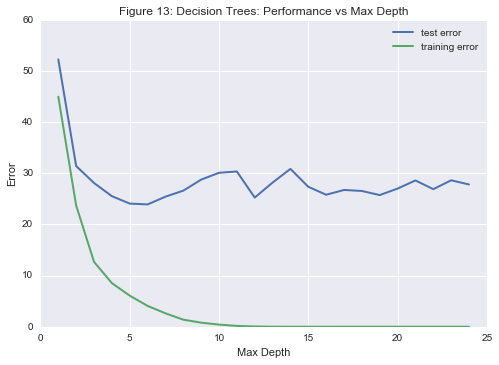

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0) 

Final Params: 
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') 

Scores on grid: 
[mean: -68.08279, std: 25.52601, params: {'max_depth': 1}, mean: -46.72022, std: 21.02827, params: {'max_depth': 2}, mean: -44.96641, std: 13.29444, 

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [14]:
"""Analyze the Boston housing data. Evaluate and validate the
performanance of a Decision Tree regressor on the housing data.
Fine tune the model to make prediction on unseen data."""

# Load data
city_data = load_data()

# Explore the data
explore_city_data(city_data)

# Training/Test dataset split
X_train, y_train, X_test, y_test = split_data(city_data)

# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

# Model Complexity Graph
model_complexity(X_train, y_train, X_test, y_test)

# Tune and predict Model
x_client, y_client = fit_predict_model(city_data)

check_price_reasonable(city_data, y_client)

compare_with_knn(city_data, x_client)